In [1]:
import sys
print(sys.executable)

/Users/damian/mlops-proyecto-fase-1-equipo-29/.venv/bin/python


## **Etapa 1.** EDA

**Objetivos:**

* Realizar tareas de EDA y limpieza de datos, eliminando valores nulos, inconsistentes, vacios, outliers, inválidos, etc. Proporcionamos también una versión no modificada (limpia) del dataset original, para que comparen sus resultados. (Pueden documentar métricas utilizadas, etc.)

Paqueterías usadas en este archivo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Lectura de la data original como referencia:

In [3]:
path_original = "../../data/raw/german_credit_original.csv"

try:
    # Leer el CSV usando la ruta relativa
    data_original = pd.read_csv(path_original)

    print("Lectura exitosa del archivo de datos crudos.")
    print(f"Filas leídas: {len(data_original)}")
    print("\nPrimeras 5 filas:")
    print(data_original.head())

except FileNotFoundError:
    print(f"ERROR: No se pudo encontrar el archivo en la ruta: {path_original}")
    print("Asegúrate de que la ruta relativa sea correcta desde la ubicación de este notebook.")
except Exception as e:
    print(f"Ocurrió un error inesperado durante la lectura: {e}")


Lectura exitosa del archivo de datos crudos.
Filas leídas: 1000

Primeras 5 filas:
   laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0         1        18      4     2   1049         1        2     4       2   
1         1         9      4     0   2799         1        3     2       3   
2         2        12      2     9    841         2        4     2       2   
3         1        12      4     0   2122         1        3     3       3   
4         1        12      4     0   2171         1        3     4       3   

   buerge  ...  verm  alter  weitkred  wohn  bishkred  beruf  pers  telef  \
0       1  ...     2     21         3     1         1      3     2      1   
1       1  ...     1     36         3     1         2      3     1      1   
2       1  ...     1     23         3     1         1      2     2      1   
3       1  ...     1     39         3     1         2      2     1      1   
4       1  ...     2     38         1     2         2      2   

Lectura de la data a modificar:

In [4]:
path = "../../data/raw/german_credit_modified.csv"

try:
    # Leer el CSV usando la ruta relativa
    data = pd.read_csv(path)

    print("Lectura exitosa del archivo de datos crudos.")
    print(f"Filas leídas: {len(data)}")
    print("\nPrimeras 5 filas:")
    print(data.head())

except FileNotFoundError:
    print(f"ERROR: No se pudo encontrar el archivo en la ruta: {path}")
    print("Asegúrate de que la ruta relativa sea correcta desde la ubicación de este notebook.")
except Exception as e:
    print(f"Ocurrió un error inesperado durante la lectura: {e}")


Lectura exitosa del archivo de datos crudos.
Filas leídas: 1020

Primeras 5 filas:
  laufkont laufzeit moral verw   hoehe sparkont beszeit rate famges buerge  \
0      1.0     18.0   4.0  2.0  1049.0      1.0     2.0  4.0    2.0    1.0   
1      1.0      9.0   4.0  0.0  2799.0      1.0     3.0  2.0    3.0    1.0   
2      2.0    12.0    2.0  9.0   841.0      2.0     4.0  2.0    2.0    1.0   
3      1.0     12.0   4.0  0.0  2122.0      1.0     3.0  3.0    3.0    1.0   
4      1.0     12.0   4.0  0.0  2171.0      1.0     3.0  4.0    3.0    NaN   

   ... alter weitkred wohn bishkred beruf   pers  telef gastarb kredit  \
0  ...  21.0      3.0  1.0      1.0   3.0    2.0    1.0     2.0    1.0   
1  ...  36.0      3.0  1.0      2.0   3.0    1.0    1.0     2.0    1.0   
2  ...  23.0      3.0  1.0      1.0   2.0    2.0    1.0     2.0    1.0   
3  ...  39.0      3.0  1.0      2.0   2.0    1.0    1.0     1.0    1.0   
4  ...  38.0      1.0  2.0      2.0   2.0  error   1.0     1.0     1.0   

  m

In [5]:
print('-----Impresión de datos originales ------')
display(data_original.head())

-----Impresión de datos originales ------


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [6]:
print('--- Descripción de las variables iniciales ---')

print(f'Dimensiones de la base: {data.shape}')

## 22 variables numéricas.
data.info()

## Si bien sabemos, por las descripciones de la base, que estamos
data['mixed_type_col'].value_counts()

--- Descripción de las variables iniciales ---
Dimensiones de la base: (1020, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   laufkont        1005 non-null   object
 1   laufzeit        1010 non-null   object
 2   moral           1003 non-null   object
 3   verw            1004 non-null   object
 4   hoehe           1012 non-null   object
 5   sparkont        1008 non-null   object
 6   beszeit         1003 non-null   object
 7   rate            1011 non-null   object
 8   famges          1013 non-null   object
 9   buerge          1007 non-null   object
 10  wohnzeit        1005 non-null   object
 11  verm            1009 non-null   object
 12  alter           1009 non-null   object
 13  weitkred        1010 non-null   object
 14  wohn            1015 non-null   object
 15  bishkred        1008 non-null   object
 16  beruf         

mixed_type_col
unknown    112
bad         98
659          5
979          4
740          4
          ... 
41           1
840          1
160          1
128          1
761          1
Name: count, Length: 500, dtype: int64

In [7]:
##-------------- DEFINICIÓN DE LOS DIFERENTES TIPOS DE VARIABLES --------------------

# Variables numéricas:
lista_paper_num = ['laufzeit', # (duration - quantitative)
              'hoehe', # (amount - quantitative)
              'alter' # (age - quantitative)
              ]

# Variables ordinales:
lista_paper_ord = ['beszeit', # (employment_duration - ordinal)
              'rate', # (installment_rate - ordinal)
              'wohnzeit', # (present_residence - ordinal)
              'verm', # (property - ordinal)
              'bishkred', # (number_credits - ordinal)
              'beruf' # (job - ordinal)
              ]

# Variables nominales & binarias:
lista_paper_cat = [ 'laufkont', # (status - categorical)
              'moral', # (credit_history - categorical)
              'verw', # (purpose - categorical)
              'sparkont', # (savings - categorical)
              'famges', # (personal_status_sex - categorical)
              'buerge', # (other_debtors - categorical)
              'weitkred', # (other_installment_plans - categorical)
              'wohn', # (housing - categorical)
              'pers', # (people_liable - binary)
              'telef', # (telephone - binary)
              'gastarb' # (foreign_worker - binary)
              ]

print("Para los datos de entrada, veamos la cantidad de cada tipo de variable obtenida:")
print("Variables numéricas:", len(lista_paper_num))
print("Variables ordinales:", len(lista_paper_ord))
print("Variables nominales & binarias:", len(lista_paper_cat))

Para los datos de entrada, veamos la cantidad de cada tipo de variable obtenida:
Variables numéricas: 3
Variables ordinales: 6
Variables nominales & binarias: 11


### **1.1** Detección de valores no válidos y conversión de variables numéricas.

In [8]:
## Exploratorio del tipo de variables que tenemos dentro del DataFrame
non_numeric_summary = {}

for col in data.columns:
    temp_numeric = pd.to_numeric(data[col], errors='coerce')
    non_numeric_elements = temp_numeric.isna()

    if non_numeric_elements.any():
        non_numeric_values = data[col][non_numeric_elements]
        non_numeric_summary[col] = non_numeric_values.value_counts().to_dict() #unique().tolist()

non_numeric_df = pd.Series(non_numeric_summary)

## Convertir el diccionario resultante en una Serie de pandas para una visualización clara
non_numeric_series = pd.Series(non_numeric_summary)
print("---- Tabla de valores no numéricos que contiene cada columns: ----")
print(non_numeric_df)

## Observamos que hay muy pocos valores atípicos, que podemos substituir por nulos, a excepión de los datos de mixed_type_col
all_unique_non_numeric_elements = []
for count_dict in non_numeric_series[:-1].values:
    all_unique_non_numeric_elements.extend(count_dict.keys())

## Elementos a substituir por Nulos
final_elements = list(set(all_unique_non_numeric_elements))
final_elements

## Reemplazamos los valores por NULL
data_clean = data.replace(final_elements, np.nan)

print("Verificación de conteo de nulos:")
print(data_clean.isnull().sum())

## Una vez limpiados los elementos, podemos convertir los valores numéricos

columnas_numericas = data_clean.columns[data_clean.columns != 'mixed_type_col'].tolist()
data_clean[columnas_numericas] = data_clean[columnas_numericas].apply(lambda x: pd.to_numeric(x, errors='coerce'))


# Eliminar valores nulos - Sí eliminamos todos los valores nulos, nos quedamos con 666 registos, perdemos el 34% de los registos, y eso es mala idea.
# print(data_clean.shape)
# data_clean = data_clean.dropna()

print(data_clean.shape)

## Una vez que ya tenemos esas variables convertidas, generamos los descriptivos:
data_clean.describe()

---- Tabla de valores no numéricos que contiene cada columns: ----
laufkont                                      {'?': 2, 'error': 2}
laufzeit                                                  {'?': 1}
moral                                                 {'error': 1}
verw                 {' null ': 2, '?': 2, ' NAN ': 1, 'error': 1}
hoehe                                       {'invalid': 3, '?': 1}
sparkont                                      {'?': 2, 'error': 1}
beszeit                                   {' NAN ': 1, 'error': 1}
rate                                    {'invalid': 2, 'error': 1}
famges                          {'invalid': 2, 'error': 1, '?': 1}
buerge                          {'invalid': 1, 'error': 1, '?': 1}
wohnzeit                                {'invalid': 1, ' NAN ': 1}
verm                                        {'invalid': 3, '?': 1}
alter                                               {'invalid': 1}
weitkred                                      {'?': 2, 'error'

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1001.000000,1009.000000,1002.000000,998.000000,1008.000000,1005.000000,1001.000000,1008.000000,1009.000000,1004.000000,...,1005.000000,1008.000000,1006.000000,1011.000000,1000.000000,1005.000000,1010.000000,1004.000000,1002.000000,1000.00000
mean,7.207792,84.906838,9.282435,5.557114,4173.232143,6.916418,4.338661,3.500992,4.139742,4.406375,...,4.450746,45.996032,7.875746,4.993076,4.094000,8.251741,6.769307,2.998008,7.723553,3.36300
std,51.092903,1832.213663,62.312761,34.653844,28013.363840,57.339912,13.012232,8.786443,26.274597,43.724350,...,31.345504,162.527743,59.884063,37.897137,31.499895,53.592580,56.506393,32.105975,63.598614,43.21174
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,1.000000,12.000000,2.000000,1.000000,1371.750000,1.000000,3.000000,2.000000,2.000000,1.000000,...,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.00000
50%,2.000000,18.000000,2.000000,2.000000,2319.500000,1.000000,3.000000,3.000000,3.000000,1.000000,...,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.00000
75%,4.000000,24.000000,4.000000,3.000000,3976.750000,3.000000,5.000000,4.000000,3.000000,1.000000,...,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.00000
max,916.000000,58140.000000,907.000000,655.000000,887992.000000,1000.000000,267.000000,198.000000,724.000000,973.000000,...,829.000000,4606.000000,966.000000,632.000000,685.000000,823.000000,987.000000,827.000000,984.000000,967.00000


### **1.2** Eliminación de valores nulos en la variable objetivo

Como hay valores nulos en la variable objetivo, eliminamos las filas correspondientes. Además, vamos a eliminar valores no válidos, con el fin de mantener la variable objetivo "limpia".

In [9]:
def clean_target_nulls(df: pd.DataFrame, target_column_name: str):
    """
    Elimina las filas del DataFrame donde la variable objetivo es nula (NaN).
    Devuelve el DataFrame completo (features y target) limpio.

    Args:
        df (pd.DataFrame): El DataFrame completo.
        target_column_name (str): El nombre de la columna objetivo.

    Returns:
        pd.DataFrame: El DataFrame sin filas con nulos en la columna target.
    """
    if target_column_name not in df.columns:
        print(f"Error: La columna objetivo '{target_column_name}' no existe en el DataFrame.")
        return df.copy()

    initial_rows = len(df)

    df_clean_target = df[(~df[target_column_name].isnull()) & (df[target_column_name].isin([0, 1]))].copy()

    # 2. Reporte
    removed_count = initial_rows - len(df_clean_target)
    print("--- Limpieza de Nulos en la Variable Objetivo ---")
    print(f"Variable objetivo: '{target_column_name}'")
    print(f"Registros eliminados: {removed_count}")
    print(f"Filas restantes: {len(df_clean_target)}")
    print("-" * 50)

    return df_clean_target

In [10]:
data_clean = clean_target_nulls(data_clean, 'kredit')

## Eliminamos además la columna desconocida
data_clean = data_clean.drop('mixed_type_col', axis=1)

--- Limpieza de Nulos en la Variable Objetivo ---
Variable objetivo: 'kredit'
Registros eliminados: 28
Filas restantes: 992
--------------------------------------------------


### **1.3** Eliminación de valores no válidos en variables categóricas

Para éste paso me apoyé de la documentación, donde se indicaba cuáles eran las variables categóricas, y de la base sin modificar para conocer los valores permitidos dentro de esas categorías.

In [11]:
## Detección de valores no válidos para las variables categóricas

## Valores válidos en las variables categóricas
isin_rules = {
        'laufkont': [1, 2, 3, 4],
        'moral': [0, 1, 2, 3, 4],
        'kredit': [0, 1],
        'verw': [2, 0, 9, 3, 1, 10, 5, 4, 6, 8],
        'sparkont': [1, 2, 3, 4, 5],
        'famges' : [1, 2, 3, 4],
        'buerge' : [1, 2, 3],
        'weitkred': [1, 2, 3],
        'wohn': [1, 2, 3],

        'beszeit': [1, 2, 3, 4, 5], # Ordinal
        'rate': [1, 2, 3, 4], # Ordinal
        'verm': [1, 2, 3, 4], # Ordinal
        'beruf': [1, 2, 3, 4], # Ordinal

        'pers': [1, 2], # Binaria
        'telef': [1, 2], # Binaria
        'gastarb': [1, 2], # Binaria
        'kredit' : [0, 1] # Binaria
    }


print('--- Conteos de valores no válidos ---')
results = []
total_rows = len(data_clean)

for col, valid_values in isin_rules.items():
    if col in data_clean.columns:

        mask_valid = data_clean[col].isin(valid_values)
         # Conteo INVÁLIDO: Filas totales menos filas válidas
        invalid_count = total_rows - mask_valid.sum()

        results.append({
                'Columna': col,
                'Regla_Validación': f"isin({valid_values})",
                'Valores_Invalidos': invalid_count,
                'Porcentaje_Invalido': np.round((invalid_count / total_rows * 100), 2)
        })

df_resultados = pd.DataFrame(results)
display(df_resultados)

df_resultados['Valores_Invalidos'].sum()

--- Conteos de valores no válidos ---


,Columna,Regla_Validación,Valores_Invalidos,Porcentaje_Invalido
0,laufkont,"isin([1, 2, 3, 4])",31,3.12
1,moral,"isin([0, 1, 2, 3, 4])",33,3.33
2,kredit,"isin([0, 1])",0,0.00
3,verw,"isin([2, 0, 9, 3, 1, 10, 5, 4, 6, 8])",29,2.92
4,sparkont,"isin([1, 2, 3, 4, 5])",23,2.32
5,famges,"isin([1, 2, 3, 4])",16,1.61
6,buerge,"isin([1, 2, 3])",27,2.72
7,weitkred,"isin([1, 2, 3])",24,2.42
8,wohn,"isin([1, 2, 3])",17,1.71
9,beszeit,"isin([1, 2, 3, 4, 5])",26,2.62


np.int64(369)

In [12]:
## ¿Qué pasa sí elimino columnas válidas?
# --- 4. Función para Eliminar Registros según Reglas ISIN ---
def filter_by_isin_rules(df: pd.DataFrame, rules: dict) -> pd.DataFrame:
    """
    Filtra (elimina) filas donde los valores de las columnas no están
    en la lista de valores válidos proporcionada por el diccionario de reglas.
    """
    initial_rows = len(df)

    combined_mask = pd.Series(True, index=df.index)

    for col, valid_values in rules.items():
        if col in df.columns:
            # Crea una máscara individual: True si el valor es válido (está en la lista)
            current_mask = df[col].isin(valid_values)

            # Combina la máscara actual con la global usando AND (&)
            combined_mask = combined_mask & current_mask

    # Aplica la máscara combinada para obtener el DataFrame limpio
    df_cleaned = df[combined_mask].copy()

    removed_rows = initial_rows - len(df_cleaned)

    print(f"\n--- Limpieza de Consistencia Categórica ---")
    print(f"Filas originales antes de la validación ISIN: {initial_rows}")
    print(f"Filas eliminadas por valores no válidos: {removed_rows}; {np.round(100 * removed_rows/initial_rows)}%")
    print(f"Filas restantes después de la limpieza categórica: {len(df_cleaned)}")
    print("-" * 40)

    return df_cleaned

data_clean_validos = filter_by_isin_rules(data_clean, isin_rules) # Se eliminarían demasiados registros, no creo que sea una opción viable.


--- Limpieza de Consistencia Categórica ---
Filas originales antes de la validación ISIN: 992
Filas eliminadas por valores no válidos: 313; 32.0%
Filas restantes después de la limpieza categórica: 679
----------------------------------------


In [13]:
## Eliminar los datos NO es una opción, vamos a hacer una imputación de datos, reemplazando los valores no válidos con la moda,
## porque son datos categóricos.

def impute_invalid_values_with_mode(df: pd.DataFrame, rules: dict) -> pd.DataFrame:
    """
    Identifica los valores en un DataFrame que no están en la lista de valores válidos
    (definida en 'rules') y los reemplaza con la MODA (el valor más frecuente)
    de esa columna.

    Args:
        df (pd.DataFrame): El DataFrame a limpiar.
        rules (dict): Un diccionario donde la clave es el nombre de la columna y el
                      valor es una lista de valores considerados válidos.

    Returns:
        pd.DataFrame: El DataFrame con los valores inconsistentes imputados.
    """
    # Creamos una copia para evitar modificar el DataFrame original
    df_imputed = df.copy()
    total_imputations = 0

    print(f"\n--- Iniciando Imputación de Consistencia Categórica (Usando la Moda) ---")

    # Iteramos sobre el diccionario de reglas
    for col, valid_values in rules.items():
        # Verificamos que la columna exista en el DataFrame
        if col in df_imputed.columns:

            # 1. Creamos la máscara para identificar los valores *inválidos*
            # Usamos el operador ~ (NOT) para invertir la condición isin()
            invalid_mask = ~df_imputed[col].isin(valid_values)

            count_invalid = invalid_mask.sum()

            if count_invalid > 0:
                # 2. Calculamos la MODA (el valor más frecuente)
                # Obtenemos la moda de TODOS los valores presentes en la columna
                # .mode().iloc[0] selecciona el primer valor modal si hay varios
                imputation_mode_value = df_imputed[col].mode()

                if not imputation_mode_value.empty:
                    mode_value = imputation_mode_value.iloc[0]

                    # 3. Reemplazamos los valores inválidos con la moda
                    # Usamos .loc[] para asignar el valor de manera eficiente
                    df_imputed.loc[invalid_mask, col] = mode_value

                    total_imputations += count_invalid
                    print(f"   - Columna '{col}': {count_invalid} valores imputados con la moda ({mode_value}).")
                else:
                    print(f"   - Columna '{col}': Advertencia: No se pudo calcular la moda. No se realizó la imputación.")

    return df_imputed
    print(f"Total general de valores imputados: {total_imputations}")
    print("-" * 40)


print('-----  Realizamos la imputación de datos ------')

data_imputed = impute_invalid_values_with_mode(data_clean, isin_rules)

print('-----  Describe de valores imputados ------')
display(data_imputed.describe())

-----  Realizamos la imputación de datos ------

--- Iniciando Imputación de Consistencia Categórica (Usando la Moda) ---
   - Columna 'laufkont': 31 valores imputados con la moda (4.0).
   - Columna 'moral': 33 valores imputados con la moda (2.0).
   - Columna 'verw': 29 valores imputados con la moda (3.0).
   - Columna 'sparkont': 23 valores imputados con la moda (1.0).
   - Columna 'famges': 16 valores imputados con la moda (3.0).
   - Columna 'buerge': 27 valores imputados con la moda (1.0).
   - Columna 'weitkred': 24 valores imputados con la moda (3.0).
   - Columna 'wohn': 17 valores imputados con la moda (2.0).
   - Columna 'beszeit': 26 valores imputados con la moda (3.0).
   - Columna 'rate': 16 valores imputados con la moda (4.0).
   - Columna 'verm': 23 valores imputados con la moda (3.0).
   - Columna 'beruf': 32 valores imputados con la moda (3.0).
   - Columna 'pers': 24 valores imputados con la moda (2.0).
   - Columna 'telef': 21 valores imputados con la moda (1.0).
  

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,992.000000,981.000000,992.000000,992.000000,982.000000,992.000000,992.000000,992.000000,992.000000,992.000000,...,992.000000,980.000000,992.000000,992.000000,972.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,2.625000,86.695209,2.531250,2.832661,4191.875764,2.084677,3.385081,3.002016,2.690524,1.140121,...,2.381048,46.391837,2.681452,1.935484,4.166667,2.919355,1.846774,1.393145,1.962702,0.694556
std,1.259675,1858.171493,1.068318,2.690234,28376.969884,1.573265,1.199100,1.120399,0.703165,0.470656,...,1.045853,164.809487,0.699819,0.529523,31.947675,0.641287,0.360387,0.488695,0.189588,0.460827
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.000000,1.000000,1372.500000,1.000000,3.000000,2.000000,2.000000,1.000000,...,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.000000,2.000000,2325.500000,1.000000,3.000000,3.000000,3.000000,1.000000,...,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.000000,3.000000,3975.250000,3.000000,5.000000,4.000000,3.000000,1.000000,...,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,58140.000000,4.000000,10.000000,887992.000000,5.000000,5.000000,4.000000,4.000000,3.000000,...,4.000000,4606.000000,3.000000,3.000000,685.000000,4.000000,2.000000,2.000000,2.000000,1.000000


### **1.4** Exploratorio de Outliers


--- REVISIÓN DE PRESENCIA DE OUTLIERS VISUALMENTE ---

--- DETECCIÓN DE OUTLIERS (Método IQR) ---
[laufzeit]: 78 outliers encontrados, 7.86 % del total 
[wohnzeit]: 10 outliers encontrados, 1.01 % del total 
[alter]: 30 outliers encontrados, 3.02 % del total 
[bishkred]: 19 outliers encontrados, 1.92 % del total 
[hoehe]: 74 outliers encontrados, 7.46 % del total 

--- PLOT DE LOS VALORES ATÍPICOS ---


------------------------------------------


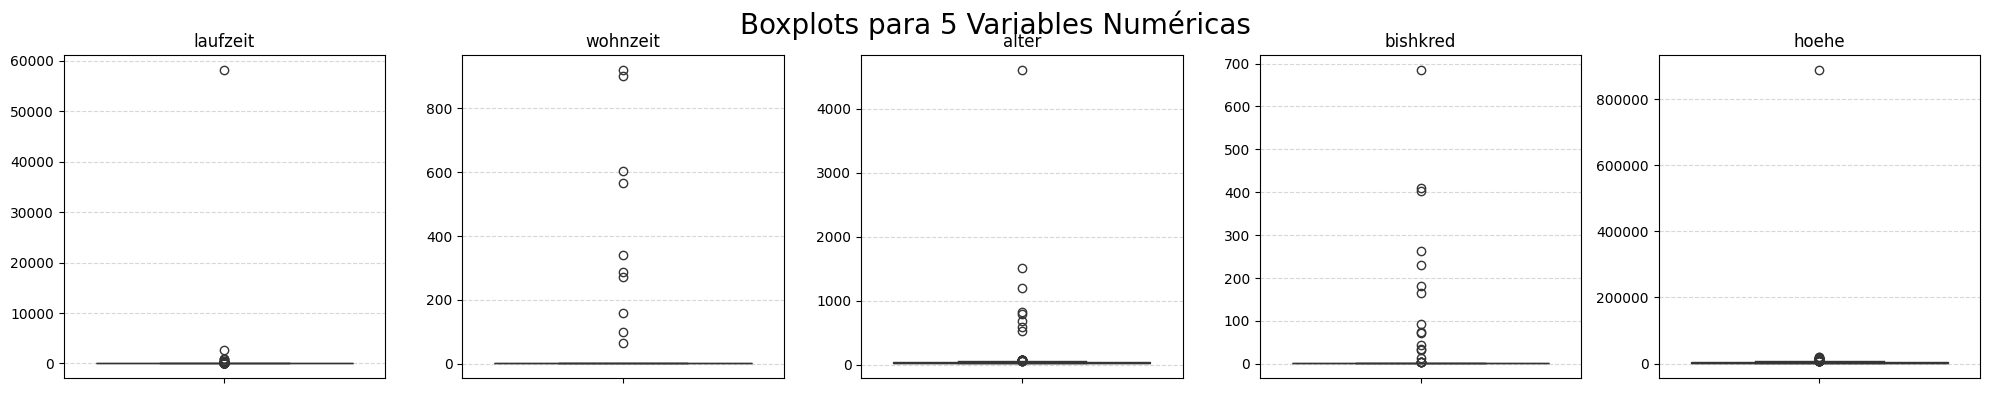

In [14]:
print("\n--- REVISIÓN DE PRESENCIA DE OUTLIERS VISUALMENTE ---")
## Seleccionamos solamente las columnas numéricas para la búsqueda de Outliers


## Éstas variables son numéricas, el resto, aunque parecen
lista_categoricos = ['laufzeit', 'wohnzeit', 'alter', 'bishkred', 'hoehe']


def plot_output(df: pd.DataFrame, listado: list) -> None:
    """
    Crea un gráfico de caja para una columna específica del DataFrame. Imprime los resultados


    Args:
        df (pd.DataFrame): El DataFrame a limpiar.
        listado (list): Listado de columnas numéricas sobre las cuales hacer la búsqueda de valores atípicos.

    Returns:
        None
    """
    df_numeric = df.select_dtypes(include=np.number)

    # Filtramos la lista de variables para trabajar solo con las que son numéricas
    variables = [var for var in lista_categoricos if var in df_numeric.columns]

    num_vars = len(variables)

    n_cols = 5
    n_rows = (num_vars + n_cols - 1) // n_cols

    plt.figure(figsize=(4 * n_cols, 4 * n_rows))

    for i, var in enumerate(variables):

        ax = plt.subplot(n_rows, n_cols, i + 1)

        sns.boxplot(y=df_numeric[var], ax=ax, color='#6B8E23') # Color Olive Drab

        ax.set_title(var, fontsize=12)
        ax.set_ylabel('') # Eliminar la etiqueta del eje Y para limpiar espacio
        ax.set_xlabel('') # Eliminar la etiqueta del eje X
        ax.tick_params(axis='y', labelsize=10)
        ax.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.suptitle(f"Boxplots para {num_vars} Variables Numéricas", fontsize=20, y=1.0)


## Función para la detección de Outliers
def detect_outliers_iqr(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Identifica los valores en un DataFrame que son atípicos (outliers) según el
    cuartil. La salida es un DataFrame con los valores atípicos.

    Args:
        df (pd.DataFrame): El DataFrame a detectar valores atípicos.
          column (str): Columna sobre la cual se hará la detección de outliers.

    Returns:
        pd.DataFrame: El DataFrame con los valores atípicos.
    """

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definición de los límites de detección
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los datos para encontrar outliers
    outliers = df[
        (df[column] < lower_bound) | (df[column] > upper_bound)
    ][column]

    return outliers



print("\n--- DETECCIÓN DE OUTLIERS (Método IQR) ---")
n = len(data_imputed)
outlier_count = 0
for var in lista_categoricos:
    outliers_df = detect_outliers_iqr(data_imputed, var)
    if not outliers_df.empty:
        print(f"[{var}]: {len(outliers_df)} outliers encontrados, { np.round(100 * len(outliers_df)/n, 2)} % del total ")
        outlier_count += len(outliers_df)

if outlier_count == 0:
    print("No se detectaron outliers en las variables seleccionadas.")

print("\n--- PLOT DE LOS VALORES ATÍPICOS ---")

plot_output(data_imputed, lista_categoricos)

print("------------------------------------------")


`NOTA: Observamos que sí será necesaria hacer una transformación de datos, y lo estaremos realizando en el segundo código.`

### Almacenamiento de salida final:

In [15]:
data_clean.to_csv(os.path.join('..', '..', 'data', 'processed', 'data_clean.csv'), index=False)